# Homework_10 - Feature Importance

Created on Sun Oct  6 18:08:05 2024 @author: hanna.dunska

# Step 1. Setting up the libraries

In [1]:
import warnings
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
import time

warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 2. Data Loading

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               193 non-null    object 
 1   fuel_type          193 non-null    object 
 2   aspiration         193 non-null    object 
 3   num_of_doors       193 non-null    int64  
 4   body_style         193 non-null    object 
 5   drive_wheels       193 non-null    object 
 6   engine_location    193 non-null    object 
 7   wheel_base         193 non-null    float64
 8   length             193 non-null    float64
 9   width              193 non-null    float64
 10  height             193 non-null    float64
 11  curb_weight        193 non-null    int64  
 12  engine_type        193 non-null    object 
 13  num_of_cylinders   193 non-null    int64  
 14  engine_size        193 non-null    int64  
 15  fuel_system        193 non-null    object 
 16  bore               193 non

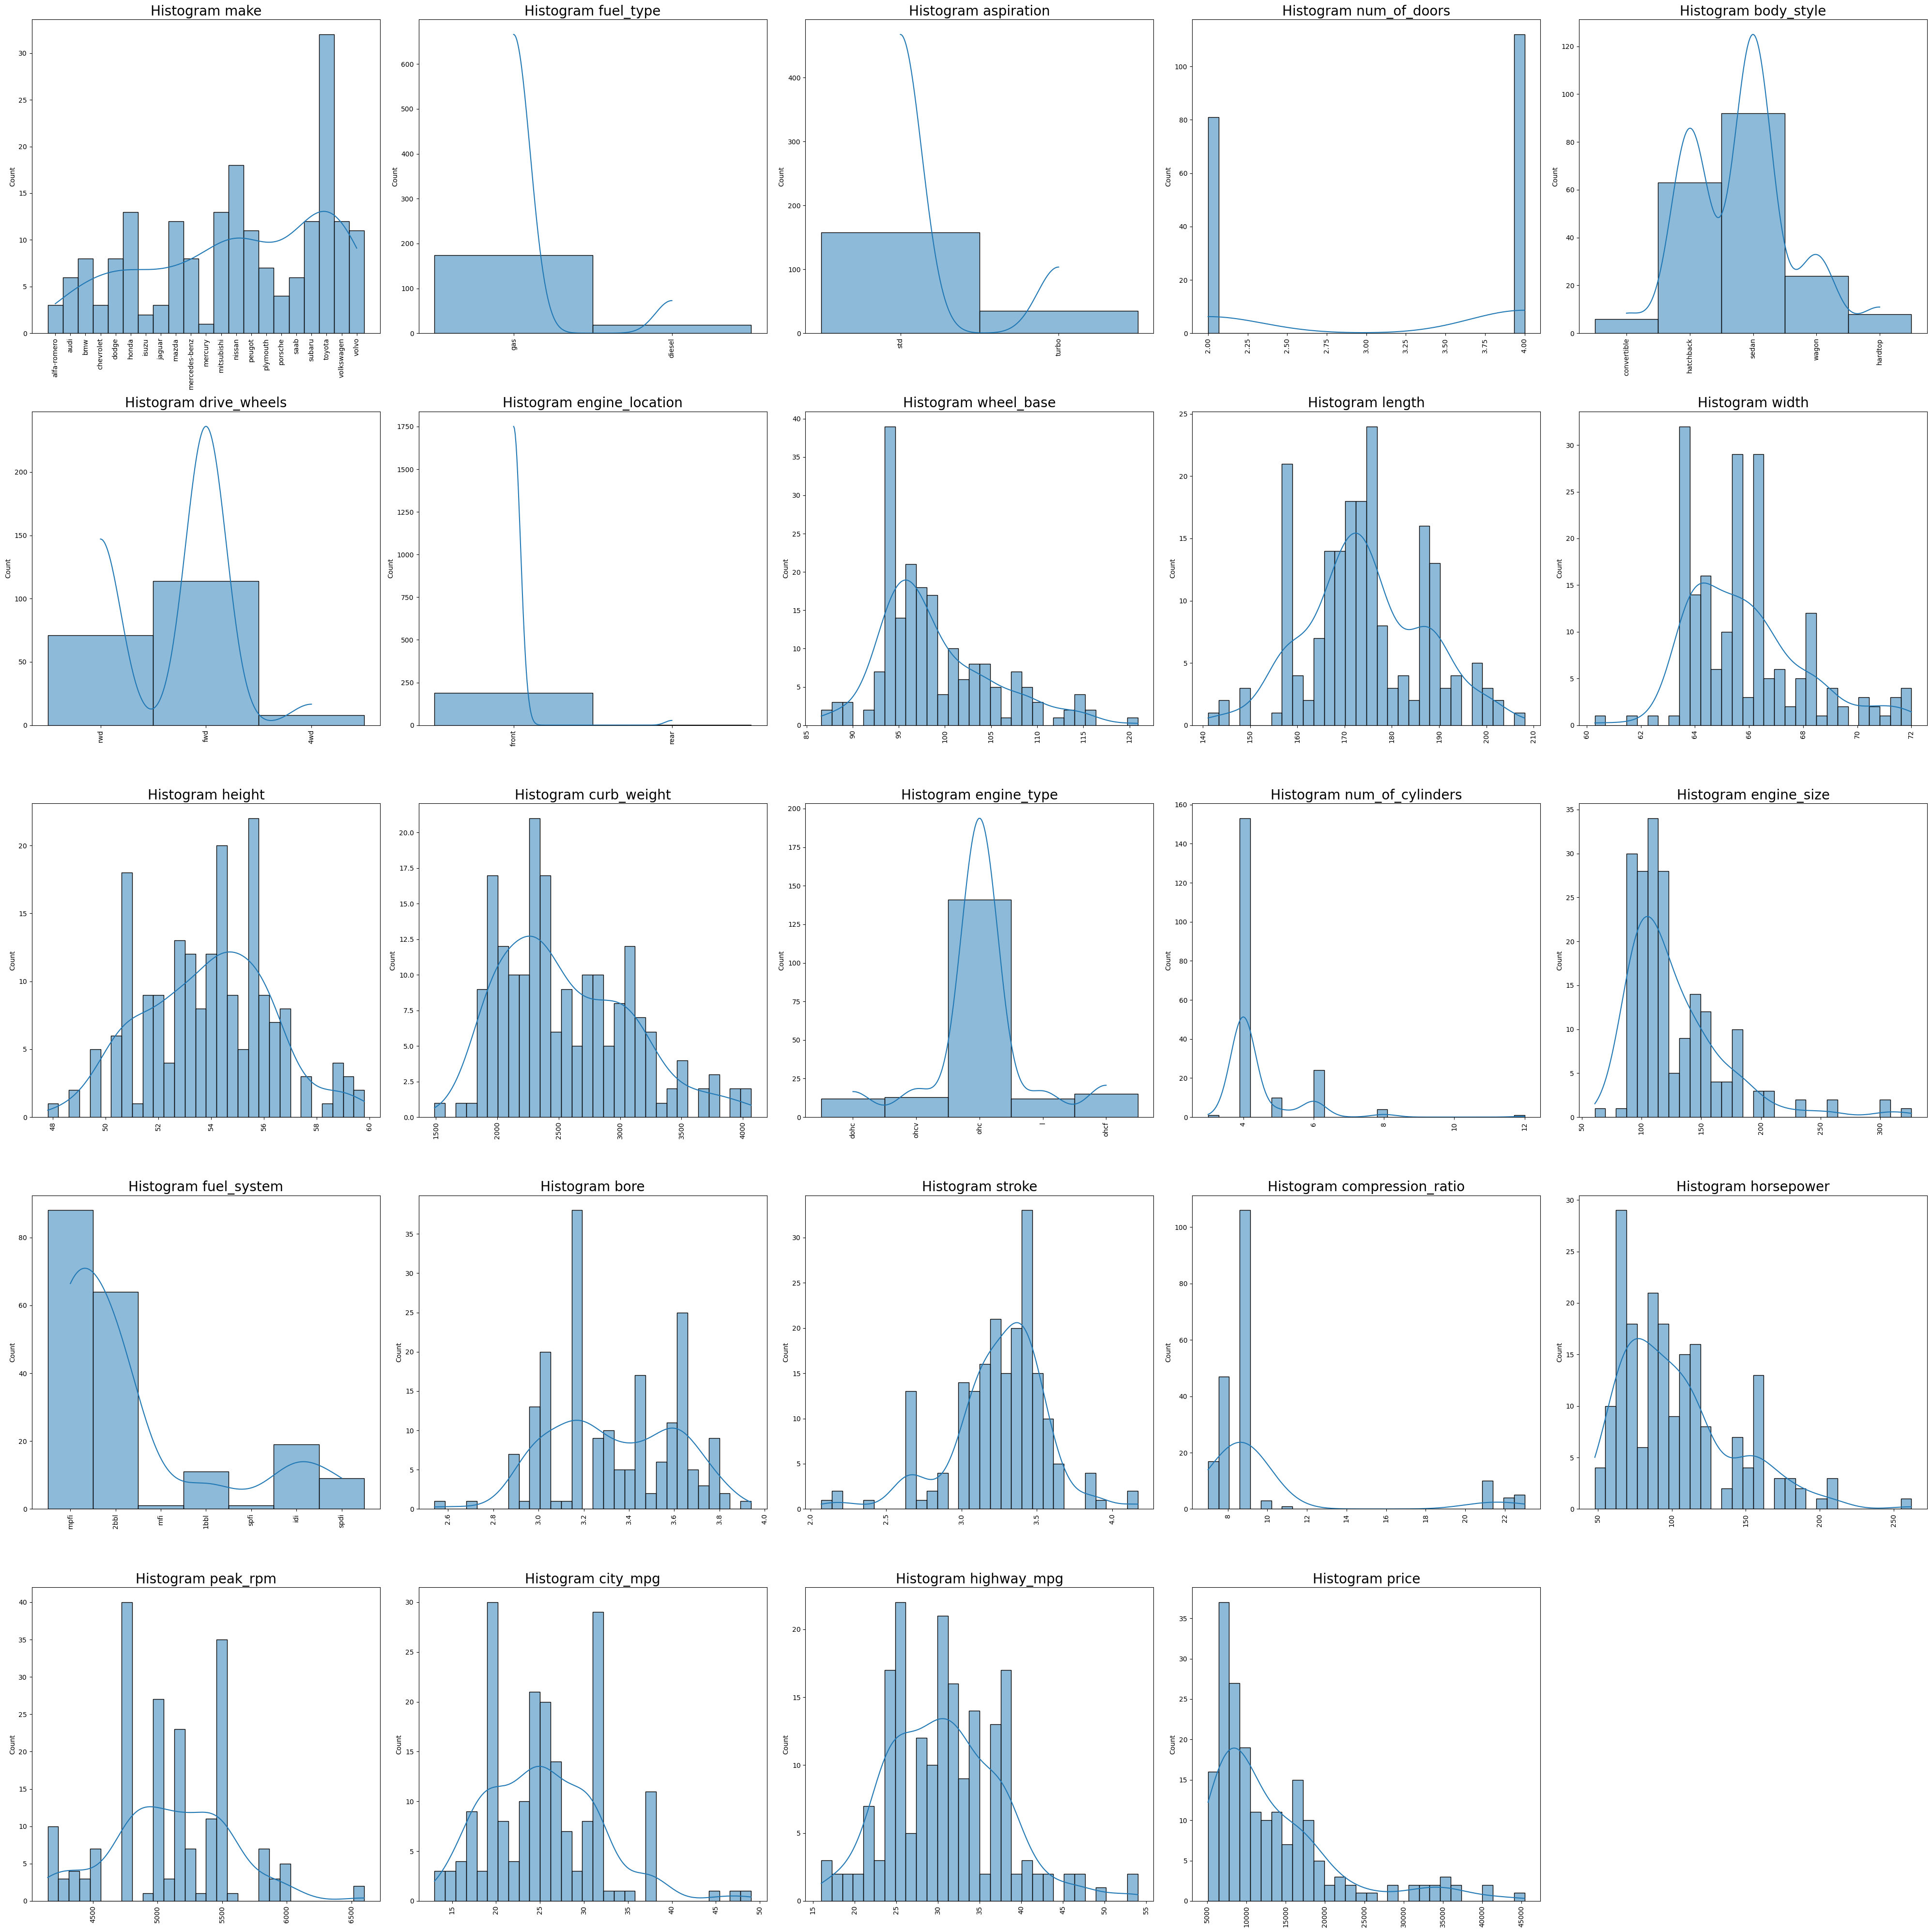

In [2]:
# Load data from the pickle file
with open('/Users/hanna.dunska/Desktop/Machine Learning/MACHINE-LEARNING-NEO/datasets/mod_05_topic_10_various_data.pkl', 'rb') as fl:
    datasets = pickle.load(fl)

# Extract the DataFrame 'autos' from the dictionary
autos = datasets['autos']
print(autos.info())
print(autos.iloc[0])

# make: The manufacturer of the car (e.g., Alfa Romeo).
# fuel_type: The type of fuel used by the car (e.g., gas).
# aspiration: The type of aspiration system used (e.g., standard or turbocharged).
# num_of_doors: The number of doors in the car (e.g., 2).
# body_style: The style of the car's body (e.g., convertible).
# drive_wheels: The type of drivetrain (e.g., rear-wheel drive, abbreviated as RWD).
# engine_location: The location of the engine (e.g., front).
# wheel_base: The wheelbase of the car (e.g., 88.6 inches).
# length: The length of the car (e.g., 168.8 inches).
# width: The width of the car (e.g., 64.1 inches).
# height: The height of the car (e.g., 48.8 inches).
# curb_weight: The weight of the car in its unloaded state (e.g., 2,548 pounds).
# engine_type: The type of engine configuration (e.g., DOHC - Dual Overhead Cam).
# num_of_cylinders: The number of cylinders in the engine (e.g., 4).
# engine_size: The size or displacement of the engine (e.g., 130 cubic inches).
# fuel_system: The fuel delivery system used (e.g., MPFI - Multi-Point Fuel Injection).
# bore: The diameter of the engine cylinders (e.g., 3.47 inches).
# stroke: The length of the piston stroke in the engine (e.g., 2.68 inches).
# compression_ratio: The engine's compression ratio (e.g., 9).
# horsepower: The power output of the engine (e.g., 111 horsepower).
# peak_rpm: The maximum engine speed (e.g., 5,000 revolutions per minute).
# city_mpg: Fuel efficiency in city driving (e.g., 21 miles per gallon).
# highway_mpg: Fuel efficiency in highway driving (e.g., 27 miles per gallon).
# price: The price of the car (e.g., $13,495).

# Function to plot histograms for each feature in the DataFrame
def plot_histograms(df):
    plt.figure(figsize=(40, 40)) 
    for i, feature in enumerate(df.columns, 1):
        plt.subplot(5, 5, i)  
        sns.histplot(df[feature], bins=30, kde=True)  
        plt.title(f'Histogram {feature}', fontsize=20)
        plt.xticks(rotation=90, fontsize=10)  
        plt.xlabel('')  
    plt.tight_layout()
    plt.show()

# Call the function to plot histograms for the 'autos' DataFrame
plot_histograms(autos)

# Step 3. Exploratory Data Analysis (EDA)

In [3]:
z_scores = np.abs(stats.zscore(autos['price']))
threshold = 3
autos_filtered = autos[z_scores < threshold]
autos = autos_filtered

# Step 4. Defining the Target Data

In [4]:
X = autos.copy()
y = X.pop('price')

# Step 5. Factorizing Categorical Features

In [5]:
cat_features = X.select_dtypes(include='object').columns.tolist()
for colname in cat_features:
    X[colname], _ = X[colname].factorize()
    
X.info()    

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 192
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               190 non-null    int64  
 1   fuel_type          190 non-null    int64  
 2   aspiration         190 non-null    int64  
 3   num_of_doors       190 non-null    int64  
 4   body_style         190 non-null    int64  
 5   drive_wheels       190 non-null    int64  
 6   engine_location    190 non-null    int64  
 7   wheel_base         190 non-null    float64
 8   length             190 non-null    float64
 9   width              190 non-null    float64
 10  height             190 non-null    float64
 11  curb_weight        190 non-null    int64  
 12  engine_type        190 non-null    int64  
 13  num_of_cylinders   190 non-null    int64  
 14  engine_size        190 non-null    int64  
 15  fuel_system        190 non-null    int64  
 16  bore               190 non-null

# Step 6. Discretizing Numerical Features

In [6]:
discrete_features = cat_features + ['num_of_doors', 'num_of_cylinders']

# Step 7. Defining MI Scores

In [7]:
mi_scores_series = pd.Series(
    mutual_info_regression(X, y, discrete_features=X.columns.isin(discrete_features), random_state=42),
    index=X.columns,
    name='MI Scores'
).sort_values(ascending=True)

# Step 8. Plotting MI Scores

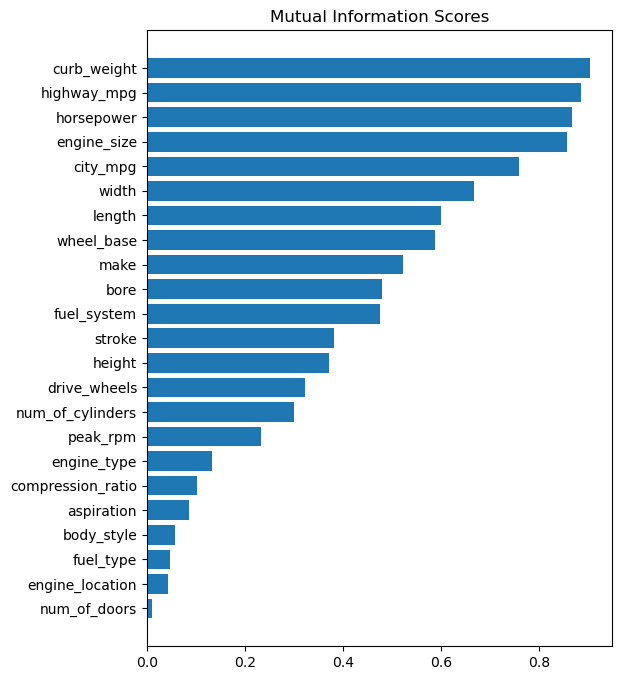

In [8]:
plt.figure(figsize=(6, 8))
plt.barh(np.arange(len(mi_scores_series)), mi_scores_series)
plt.yticks(np.arange(len(mi_scores_series)), mi_scores_series.index)
plt.title('Mutual Information Scores')

plt.show()

# Step 9. Splitting the Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42)

# Step 10. Categorical Features Encoding

In [10]:
encoder = ce.TargetEncoder(cols=discrete_features)
X_train[discrete_features] = encoder.fit_transform(X_train[discrete_features], y_train)
X_test[discrete_features] = encoder.transform(X_test[discrete_features])

# Step 11. Numerical Features Asymmetry Handling and Standardization

In [11]:
numerical_features = X.select_dtypes(include=[np.float64, np.int64]).columns.tolist()

power_transform = PowerTransformer(standardize=True)

X_train[numerical_features] = power_transform.fit_transform(X_train[numerical_features])
X_test[numerical_features] = power_transform.transform(X_test[numerical_features])

# Step 12. Modeling Error Evaluation

In [12]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Decorator
mape_scores = {}

def measure_mape_time_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        predictions = func(*args, **kwargs)
        mape = mean_absolute_percentage_error(args[-1], predictions)
        model_name = args[0].__class__.__name__
        end_time = time.time()
        execution_time = end_time - start_time
        mape_scores[model_name] = [mape, execution_time]
        print(f'{model_name} MAPE: {mape:.4f}%')
        print(f'{model_name} Inference Time: {execution_time:.4f} s')
        return predictions
    return wrapper

@measure_mape_time_decorator
def predict_with_measure(model, Xt, yt):
    return model.predict(Xt)
    
# %%
mod_grd_bst = (GradientBoostingRegressor(
    n_estimators=100,          
    learning_rate=0.2,         
    max_depth=2,              
    subsample=0.75,
    random_state=42
).fit(X_train, y_train))

prd_grd_bst = predict_with_measure(mod_grd_bst, X_test, y_test)

GradientBoostingRegressor MAPE: 10.5788%
GradientBoostingRegressor Inference Time: 0.0007 s


# Step 13. Defining GB Scores

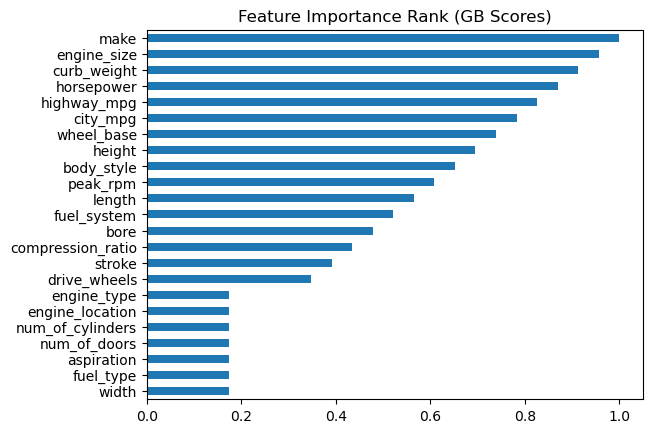

In [13]:
importance_rank = pd.Series(
    data=mod_grd_bst.feature_importances_,
    index=X.columns,
    name='GB Scores'
).rank(pct=True).sort_values(ascending=True)


importance_rank.plot(kind='barh')
plt.title("Feature Importance Rank (GB Scores)")
plt.show()

# Step 14. Melting the MI and GB Scores

In [14]:
combined_scores = pd.concat([mi_scores_series, importance_rank], axis=1).fillna(0)
combined_scores_sorted = combined_scores.sort_values(by='MI Scores', ascending=False)

combined_scores_melted = combined_scores_sorted.reset_index().melt(id_vars='index', var_name='Score Type', value_name='Score Value')
combined_scores_melted.rename(columns={'index': 'Feature'}, inplace=True)

# Step 15. Plotting the MI and GB Scores

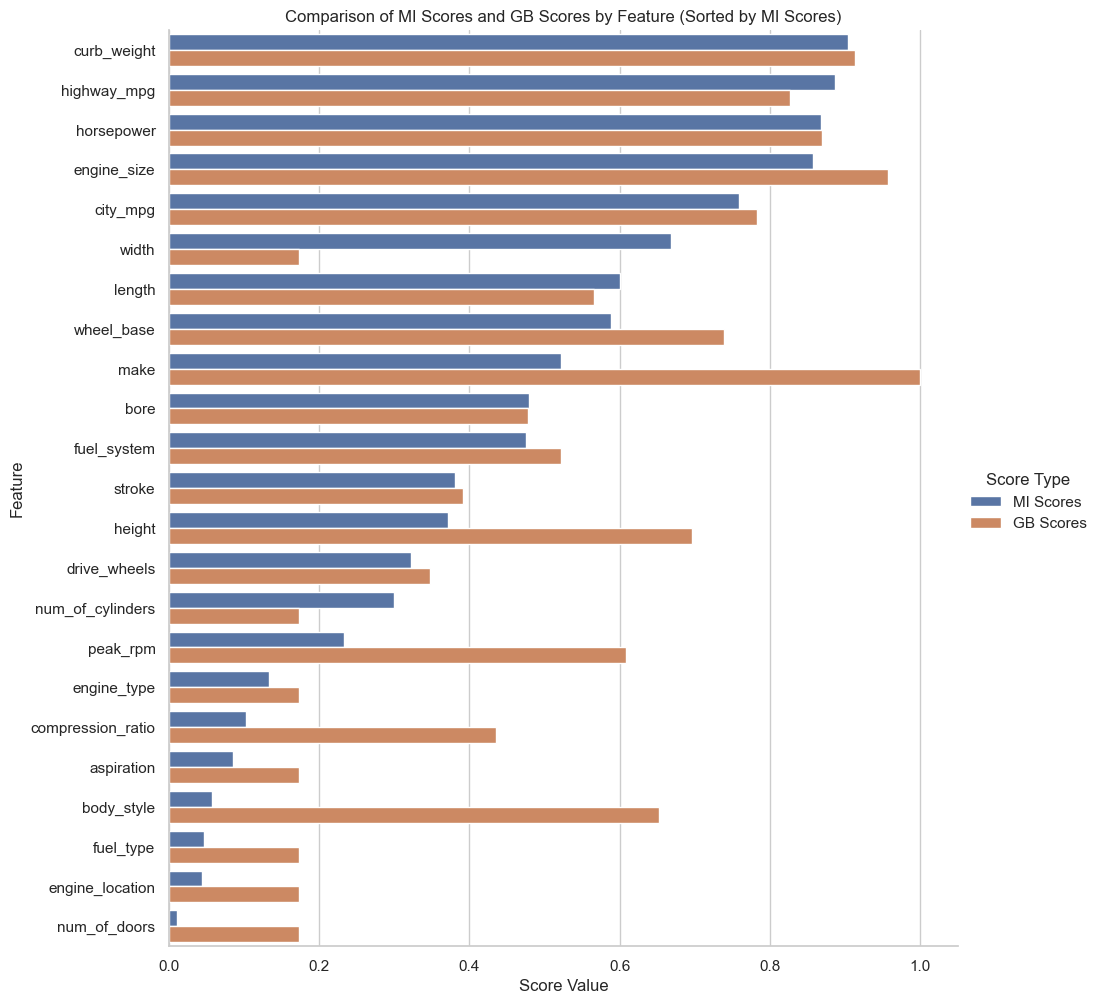

In [15]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=combined_scores_melted, kind="bar",
    x="Score Value", y="Feature", hue="Score Type",
    height=10, aspect=1
)

g.set_axis_labels("Score Value", "Feature")
g.legend.set_title("Score Type")
plt.title('Comparison of MI Scores and GB Scores by Feature (Sorted by MI Scores)')

plt.show()


# Step 16. Conclusion

In this work, I focused on the analysis of the autos dataset, particularly regarding the identification of which features should be treated as discrete based on their context. I utilized the mutual_info_regression() method from the sklearn library to evaluate feature importance. This method allowed me to understand the relationships between features and the target variable, price.

After it, I built a Gradient Boosting Regression model. Importantly, I did not remove any features in the Gradient Boosting Regression model, as our task involves comparing all features. The model was trained and tested, and I extracted feature importance from it for comparison through visualization. While the standard feature importance method provided valuable insights, it is not always a precise and universal tool for all cases.

The mutual_info_regression() method offers a general understanding of feature importance, providing a broad view of their influence. Therefore, this analysis highlights the need for careful consideration when interpreting feature importance scores, as they can vary depending on the method used.